In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
path  = 'train.txt'

df1 = pd.read_csv(path, sep=",")
df1

,x1,x2,label
0,1.0,1.1,0
1,5.0,4.0,0
2,1.1,1.1,0
3,2.1,1.0,0
4,3.0,2.0,0
5,5.0,1.0,0
6,0.0,0.0,1
7,-1.0,-2.0,1
8,-2.0,-2.0,1
9,-2.5,-1.0,1


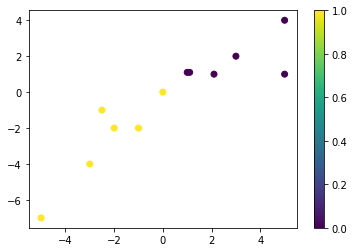

In [4]:
plt.scatter(df1['x1'],df1['x2'],c=df1['label'])
plt.colorbar()

In [5]:
class0 = df1[:6]
class1 = df1[6:]

In [6]:
class0 = class0.drop(['label'], axis=1, errors='ignore')
class1 = class1.drop(['label'], axis=1, errors='ignore')

In [7]:
class0

,x1,x2
0,1.0,1.1
1,5.0,4.0
2,1.1,1.1
3,2.1,1.0
4,3.0,2.0
5,5.0,1.0


##normalize the dataset

In [8]:
X = []
for x1 in df1['x1']:
  X.append(x1)
for x2 in df1['x2']:
  X.append(x2)

In [9]:
mean = np.mean(X)
mean

-0.08750000000000006

In [10]:
std = np.std(X)
std

2.9517385413797523

In [11]:
df1['x1_norm'] = 0.0
df1['x2_norm'] = 0.0
df1

,x1,x2,label,x1_norm,x2_norm
0,1.0,1.1,0,0.0,0.0
1,5.0,4.0,0,0.0,0.0
2,1.1,1.1,0,0.0,0.0
3,2.1,1.0,0,0.0,0.0
4,3.0,2.0,0,0.0,0.0
5,5.0,1.0,0,0.0,0.0
6,0.0,0.0,1,0.0,0.0
7,-1.0,-2.0,1,0.0,0.0
8,-2.0,-2.0,1,0.0,0.0
9,-2.5,-1.0,1,0.0,0.0


In [12]:
i=0
for i in range(len(df1)):
  val_x1 = df1['x1'][i]
  val_x2 = df1['x2'][i]
  df1.at[i,'x1_norm'] = (val_x1-mean)/std
  df1.at[i,'x2_norm'] = (val_x2-mean)/std

df1


,x1,x2,label,x1_norm,x2_norm
0,1.0,1.1,0,0.368427,0.402305
1,5.0,4.0,0,1.723561,1.384777
2,1.1,1.1,0,0.402305,0.402305
3,2.1,1.0,0,0.741089,0.368427
4,3.0,2.0,0,1.045994,0.707210
5,5.0,1.0,0,1.723561,0.368427
6,0.0,0.0,1,0.029644,0.029644
7,-1.0,-2.0,1,-0.309140,-0.647923
8,-2.0,-2.0,1,-0.647923,-0.647923
9,-2.5,-1.0,1,-0.817315,-0.309140


In [13]:
##zscores is an in built function
# df1_trunc = df1[['x1','x2']]
# zscores = stats.zscore(df1_trunc)
# zscores

,x1,x2
0,0.228732,0.560914
1,1.551518,1.588272
2,0.261801,0.560914
3,0.592498,0.525488
4,0.890125,0.879749
5,1.551518,0.525488
6,-0.101965,0.171226
7,-0.432661,-0.537296
8,-0.763358,-0.537296
9,-0.928706,-0.183035


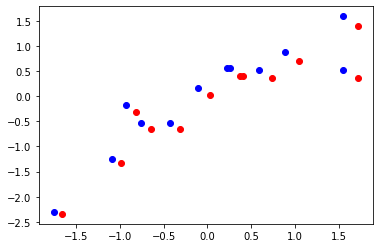

In [35]:
##comparing in built function and without in built function
# plt.scatter(df1['x1_norm'],df1['x2_norm'],color='red')
# plt.scatter(zscores['x1'],zscores['x2'],color='blue')

##find µ0,µ1, Σ0, Σ1

In [14]:
meu0=class0.mean() #by default axis=0 which is column in np 
print(list(meu0)) 

[2.8666666666666667, 1.7]


In [15]:
cov0=class0.cov()
print(cov0)

          x1     x2
x1  3.262667  1.234
x2  1.234000  1.416


In [16]:
meu1=class1.mean() #by default axis=0 which is column in np 
print(list(meu1)) 

[-2.25, -2.6666666666666665]


In [17]:
cov1=class1.cov()
print(cov0)

          x1     x2
x1  3.262667  1.234
x2  1.234000  1.416


##prior omega is given 0.5

In [18]:
priorOmega1 = 0.5
meanClass1 = np.array(meu0)
varainceClass1 = np.array(cov0)

priorOmega2 = 0.5
meanClass2 = np.array(meu1)
varainceClass2 = np.array(cov1)

##define normal function

In [19]:
def normal(x, mean, variance):
  out = np.zeros((x.shape[0],))
  for i in range(x.shape[0]):
    _x = x[i, :]
    out[i,] = np.exp(- 0.5 * np.dot(_x - mean, np.dot(np.linalg.inv(variance), (_x - mean).T))) / (((2 * 3.14) ** x.shape[1]) * np.linalg.det(variance)) ** 0.5
  return out

##test data

In [20]:
testX2 = np.array([[2.5, 2.5], [-1.25, -1.25], [-0.7, -0.5]])

In [21]:
testX2

array([[ 2.5 ,  2.5 ],
       [-1.25, -1.25],
       [-0.7 , -0.5 ]])

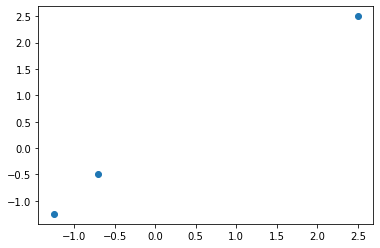

In [23]:
plt.scatter(testX2[:,0],testX2[:,1])

In [25]:
test_df = pd.DataFrame(testX2, columns = ['x1','x2'])
test_df['class'] = -1
test_df

,x1,x2,class
0,2.50,2.50,-1
1,-1.25,-1.25,-1
2,-0.70,-0.50,-1


##Run Classifier

In [26]:


norm1 = normal(testX2, meanClass1, varainceClass1)
norm2 = normal(testX2, meanClass2, varainceClass2)

for i in range(testX2.shape[0]):
  print(testX2[i, :], 'are in', end = ' ')

  if norm1[i] > norm2[i]:
    test_df['class'][i] = 0
    print('Class 0')
  else:
    test_df['class'][i] = 1
    print('Class 1')

[2.5 2.5] are in Class 0
[-1.25 -1.25] are in Class 1
[-0.7 -0.5] are in Class 1


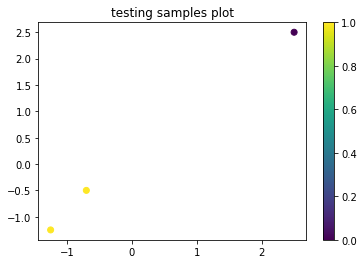

In [27]:
plt.title('testing samples plot')
plt.scatter(test_df['x1'], test_df['x2'], c=test_df['class'])
plt.colorbar()

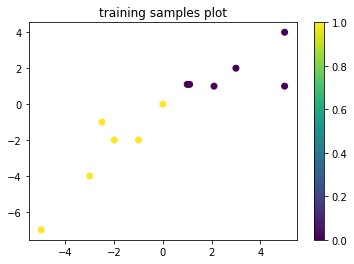

In [28]:
plt.title('training samples plot')
plt.scatter(df1['x1'],df1['x2'],c=df1['label'])
plt.colorbar()